<a href="https://colab.research.google.com/github/daniela2001-png/IA/blob/develop/actividad_dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 02 - Búsqueda y sistemas basados en reglas


*Para esta actividad usaremos el dataset con periodo* **2022**




In [192]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# get data from a remote csv

# As fisrt step we set the separator by ";" instead of the default value "," also we define the encoding type as "latin-1"
df = pd.read_csv("https://raw.githubusercontent.com/julihdez36/Inteligencia_artificial/main/Forbes%202000%202022.csv", encoding="latin-1", sep=";")

In [ ]:
# Checks the shape for this dataframe (df) and gets the columns
print(df.shape)
print(df.columns)

(2000, 8)
Index(['ï»¿Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')


In [ ]:
df.sample(6)

,ï»¿Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/12/22 ($m),Unnamed: 7
735,736,Coinbase,United States,"$7,840","$3,150","$21,270","$28,640",NaN
377,378,State Street,United States,"$11,540","$2,780","$322,350","$26,040",NaN
1837,1838,Beijing Oriental Yuhong Waterproof Technology,China,"$4,920",$652,"$7,800","$16,720",NaN
74,75,BHP Group,Australia,"$65,550","$16,920","$105,720","$178,070",NaN
319,320,Sumitomo,Japan,"$48,220","$2,690","$77,800","$20,280",NaN
1025,1026,BÃ¢loise Group,Switzerland,"$11,060",$644,"$97,850","$8,190",NaN


In [ ]:
# As second step we're gonna rename  each column
df.columns = ["Rank", "Company_Name", "Country", "Sales", "Profits", "Assets", "Market_Value", "Unnamed"]

In [ ]:
# Verify how many nan's we have into the "Unnamed" column
df["Unnamed"].isna().sum()

2000

In [ ]:
# Here we can validate that the unique value that can be have this column will be of type NaN
df["Unnamed"].unique()

array([nan])

In [ ]:
# As we got that the "Unnamed" column has all its records with NaN values, we can delete it
# because this column does not have any relevant information for the given dataset
df = df.drop(columns=['Unnamed'])

In [ ]:
# we obtain relevant information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Company_Name  2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profits       2000 non-null   object
 5   Assets        2000 non-null   object
 6   Market_Value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [ ]:
# We get some random records from df
df.sample(n=10)

,Rank,Company_Name,Country,Sales,Profits,Assets,Market_Value
682,683,Riyad Bank,Saudi Arabia,"$3,230","$1,610","$86,760","$31,760"
456,457,Corteva,United States,"$15,650","$1,760","$42,340","$41,920"
330,331,Nippon Steel,Japan,"$57,540","$5,450","$74,590","$14,920"
1717,1718,Emera,Canada,"$4,710",$447,"$27,110","$13,130"
977,978,China International Marine,China,"$25,300","$1,030","$24,210","$5,480"
1470,1471,Charoen Pokphand Foods,Thailand,"$16,010",$388,"$25,230","$5,920"
1105,1106,China Aoyuan Group,China,"$10,860",$838,"$48,930",$446
744,745,Telkom Indonesia,Indonesia,"$10,020","$1,730","$19,450","$31,880"
1430,1431,Henry Schein,United States,"$12,400",$624,"$8,480","$12,050"
1980,1981,WT Microelectronics,Taiwan,"$16,040",$284,"$6,270","$1,980"


In [ ]:
# As we can see the columns ["Sales", "Profits", "Assets", "Market_Value"] has "object" as datum type
# This is a problem if we want to do some arithmetic operations
# For this reason we will do conversion/parsing between data types (clean data)

# Here we replace each "," & "$" by ""
df = df.replace(to_replace=[",", "\$"], value="", regex=True)

In [ ]:
df.sample(3)

,Rank,Company_Name,Country,Sales,Profits,Assets,Market_Value
1997,1998,Sichuan Changhong Electric,China,15720,53,12110,1960
1676,1677,Sunny Optical Technology Group,China,5810,773,6080,15150
659,660,First Republic Bank,United States,5530,1540,187120,28210


In [ ]:
# Now we are gonna change the datum type from object to float
df["Sales"] = df["Sales"].astype(float)
df["Profits"] = df["Profits"].astype(float)
df["Assets"] = df["Assets"].astype(float)
df["Market_Value"] = df["Market_Value"].astype(float)


In [ ]:
# With the attribute dtypes we can check the new data types for our df
df.dtypes

Rank              int64
Company_Name     object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market_Value    float64
dtype: object

In [ ]:
df

,Rank,Company_Name,Country,Sales,Profits,Assets,Market_Value
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0
1,2,ICBC,China,208130.0,54030.0,5518510.0,214430.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0
4,5,China Construction Bank,China,202070.0,46890.0,4746950.0,181320.0
...,...,...,...,...,...,...,...
1995,1996,Shenzhen Feima International Supply Chain,China,37.0,1410.0,166.0,1140.0
1996,1997,NMDC,India,3520.0,1410.0,5710.0,6400.0
1997,1998,Sichuan Changhong Electric,China,15720.0,53.0,12110.0,1960.0
1998,1999,Satellite Chemical,China,4410.0,931.0,7640.0,9520.0


# Exploratory Data Analysis [EDA]
1. Tabular methods
2. Numerical methods
3. Graphic Methods

In [ ]:
# Tabular methods

# Here we get the absolute frequency
absolute_fr = df.Country.value_counts()

# Here we get the relative frequency with the help of normalize parameter
relative_fr = df.Country.value_counts(normalize=True) * 100

# For example if we want to know how many countries occupied  the 50% over the total of companies
accumulative_fr = relative_fr.cumsum()
# In this case the number of countries that are into this range are equal to 3


# Now we create a dataframe with these previous data, for can understand  easier the value of this information
df_frequencies = pd.DataFrame({"absolute_fr": absolute_fr, "relative_fr": relative_fr, "accumulative_fr": accumulative_fr})
df_frequencies

,absolute_fr,relative_fr,accumulative_fr
United States,590,29.50,29.50
China,297,14.85,44.35
Japan,196,9.80,54.15
South Korea,65,3.25,57.40
United Kingdom,64,3.20,60.60
Canada,58,2.90,63.50
India,55,2.75,66.25
France,54,2.70,68.95
Hong Kong,54,2.70,71.65
Germany,52,2.60,74.25


In [ ]:
# Top 10 countries with more companies
df_frequencies.head(n=10)

,absolute_fr,relative_fr,accumulative_fr
United States,590,29.50,29.50
China,297,14.85,44.35
Japan,196,9.80,54.15
South Korea,65,3.25,57.40
United Kingdom,64,3.20,60.60
Canada,58,2.90,63.50
India,55,2.75,66.25
France,54,2.70,68.95
Hong Kong,54,2.70,71.65
Germany,52,2.60,74.25


In [160]:
def get_filtered_countries(groups):
  return groups["absolute_fr"].count() > 1

# Get all the countries with the same number of companies
groups = df_frequencies.groupby('absolute_fr')
filtered_values = groups.filter(get_filtered_countries)

# The number of countries with the same number of companies is equal to 39 !
filtered_values.shape

(39, 3)

In [181]:
# Now we're gonna try to get the company with the lowest average sales ...
groups = df.groupby('Country')
list_avg = []
for name, g in groups:
  list_avg.append(tuple([g["Sales"].mean(), (name)]))

company_with_lowest_avg = min(list_avg, key=lambda x: x[0])

print(company_with_lowest_avg)
# This means that the company with the lowest average sales is "Cayman Islands"

(1400.0, 'Cayman Islands')


In [188]:
# Now we want to get the companies that are in north america

north_america_countries = ["United States", "Canada", "Mexico"]
df[df['Country'].isin(north_america_countries)]

,Rank,Company_Name,Country,Sales,Profits,Assets,Market_Value
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0
5,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0
6,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0
8,9,Bank of America,United States,96830.0,31000.0,3238220.0,303100.0
...,...,...,...,...,...,...,...
1983,1984,Unity Software,United States,1110.0,-533.0,4840.0,22410.0
1986,1987,Twilio,United States,2840.0,-950.0,13000.0,22290.0
1987,1988,Whitecap Resources,Canada,1820.0,1420.0,5450.0,5170.0
1991,1992,Match Group,United States,2980.0,278.0,5060.0,22040.0


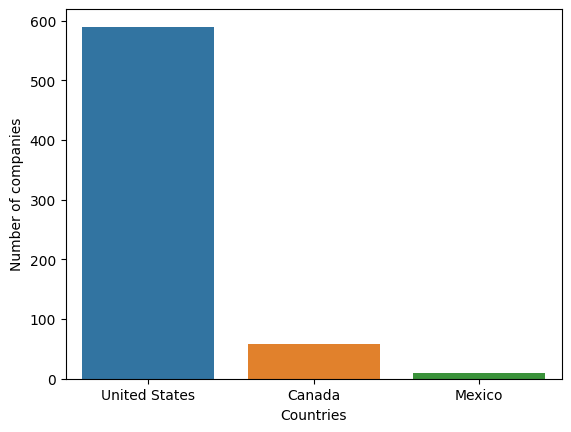

In [199]:
# Plot the total of companies that are by country (only north america)
# Graphic method
df_frequencies["country"] = df_frequencies.index
final_df = df_frequencies[df_frequencies["country"].isin(north_america_countries)]

sns.barplot(data=final_df, x="country", y="absolute_fr")
plt.xlabel('Countries')
plt.ylabel('Number of companies')
plt.show()

In [207]:
# Numeric methods

df.describe().round(2)

# Conclusions:
# These statistical data inform us that the average sales over the total number of companies was equal to 23876.04 million dollars
# and that the maximum value of sales was equal to 572750.00 million dollars and that there is a standard deviation of 40943.90 million dollars,
# that is, the margin of difference with respect to the average is that amount over the total number of records


,Rank,Sales,Profits,Assets,Market_Value
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,23876.04,2502.12,117035.24,38242.61
std,577.49,40943.90,6159.20,363742.61,117206.80
min,1.00,0.00,-12050.00,166.00,144.00
25%,500.75,5607.50,590.00,14797.50,7325.00
50%,1000.50,12170.00,1055.00,32010.00,16625.00
75%,1500.25,23725.00,2270.00,77815.00,34710.00
max,2000.00,572750.00,105360.00,5518510.00,2640320.00


correlation between Sales & Assets is: 0.7965782111577242


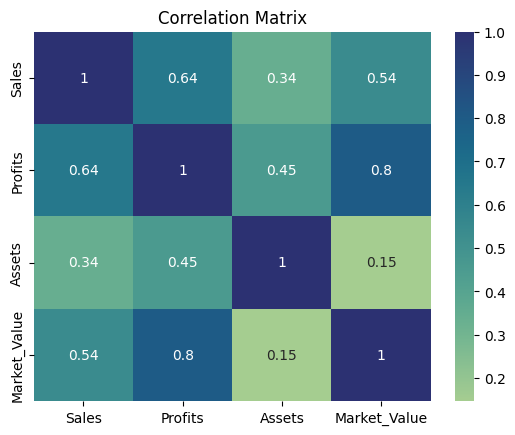

In [212]:
# Correlation

correlation = df['Profits'].corr(df['Market_Value'])
print(f"correlation  Profits & Market_Value is: {correlation}")

# This previous value for the correlation  is good, because  the value is near to 1
# Therefore it means that there is some type of proportional relationship between these two columns.

# Correlation matrix
sns.heatmap(df.iloc[:, 3:].corr(), annot = True, cmap = "crest")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# KMeans ...